# Import Statements

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Data Cleaning

In [24]:
# Load the dataset
data = pd.read_csv("credit_scoring.csv")

# Display the first few rows and basic information about the dataset
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


(   Age  Gender Marital Status Education Level Employment Status  \
 0   60    Male        Married          Master          Employed   
 1   25    Male        Married     High School        Unemployed   
 2   30  Female         Single          Master          Employed   
 3   58  Female        Married             PhD        Unemployed   
 4   32    Male        Married        Bachelor     Self-Employed   
 
    Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
 0                      0.22           2685.0                          2   
 1                      0.20           2371.0                          9   
 2                      0.22           2771.0                          6   
 3                      0.12           1371.0                          2   
 4                      0.99            828.0                          2   
 
    Loan Amount  Interest Rate  Loan Term   Type of Loan  
 0      4675000           2.65         48  Personal Loan  
 1      361900

In [25]:
# Check for and remove duplicates
initial_row_count = data.shape[0]
data = data.drop_duplicates()
final_row_count = data.shape[0]
duplicates_removed = initial_row_count - final_row_count
duplicates_removed

0

In [26]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Education Level',
                                             'Employment Status', 'Type of Loan'], drop_first=True)

# Identify outliers using the IQR method
numeric_cols = ['Age', 'Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts',
                'Loan Amount', 'Interest Rate', 'Loan Term']
outliers = {}
for col in numeric_cols:
    Q1 = data_encoded[col].quantile(0.25)
    Q3 = data_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = data_encoded[(data_encoded[col] < Q1 - 1.5 * IQR) | (data_encoded[col] > Q3 + 1.5 * IQR)].shape[0]
print(data_encoded)
outliers

     Age  Credit Utilization Ratio  Payment History  \
0     60                      0.22           2685.0   
1     25                      0.20           2371.0   
2     30                      0.22           2771.0   
3     58                      0.12           1371.0   
4     32                      0.99            828.0   
..   ...                       ...              ...   
995   59                      0.74           1285.0   
996   64                      0.77           1857.0   
997   63                      0.18           2628.0   
998   51                      0.32           1142.0   
999   37                      0.17           1028.0   

     Number of Credit Accounts  Loan Amount  Interest Rate  Loan Term  \
0                            2      4675000           2.65         48   
1                            9      3619000           5.19         60   
2                            6       957000           2.76         12   
3                            2      4731000    

{'Age': 0,
 'Credit Utilization Ratio': 0,
 'Payment History': 0,
 'Number of Credit Accounts': 0,
 'Loan Amount': 0,
 'Interest Rate': 0,
 'Loan Term': 0}

# Exploratory Data Analysis

## Visualizing distributions

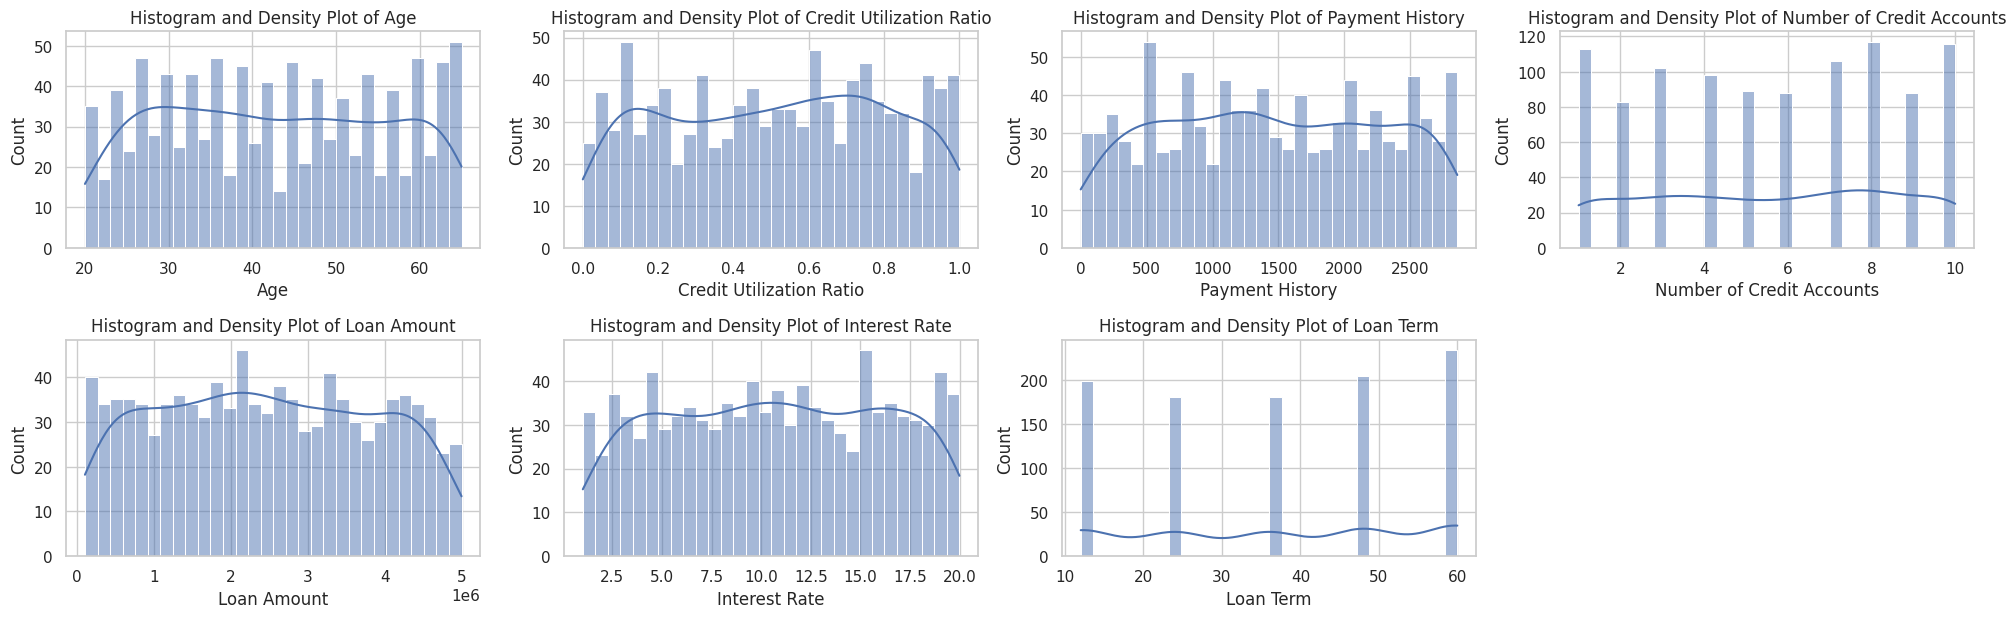

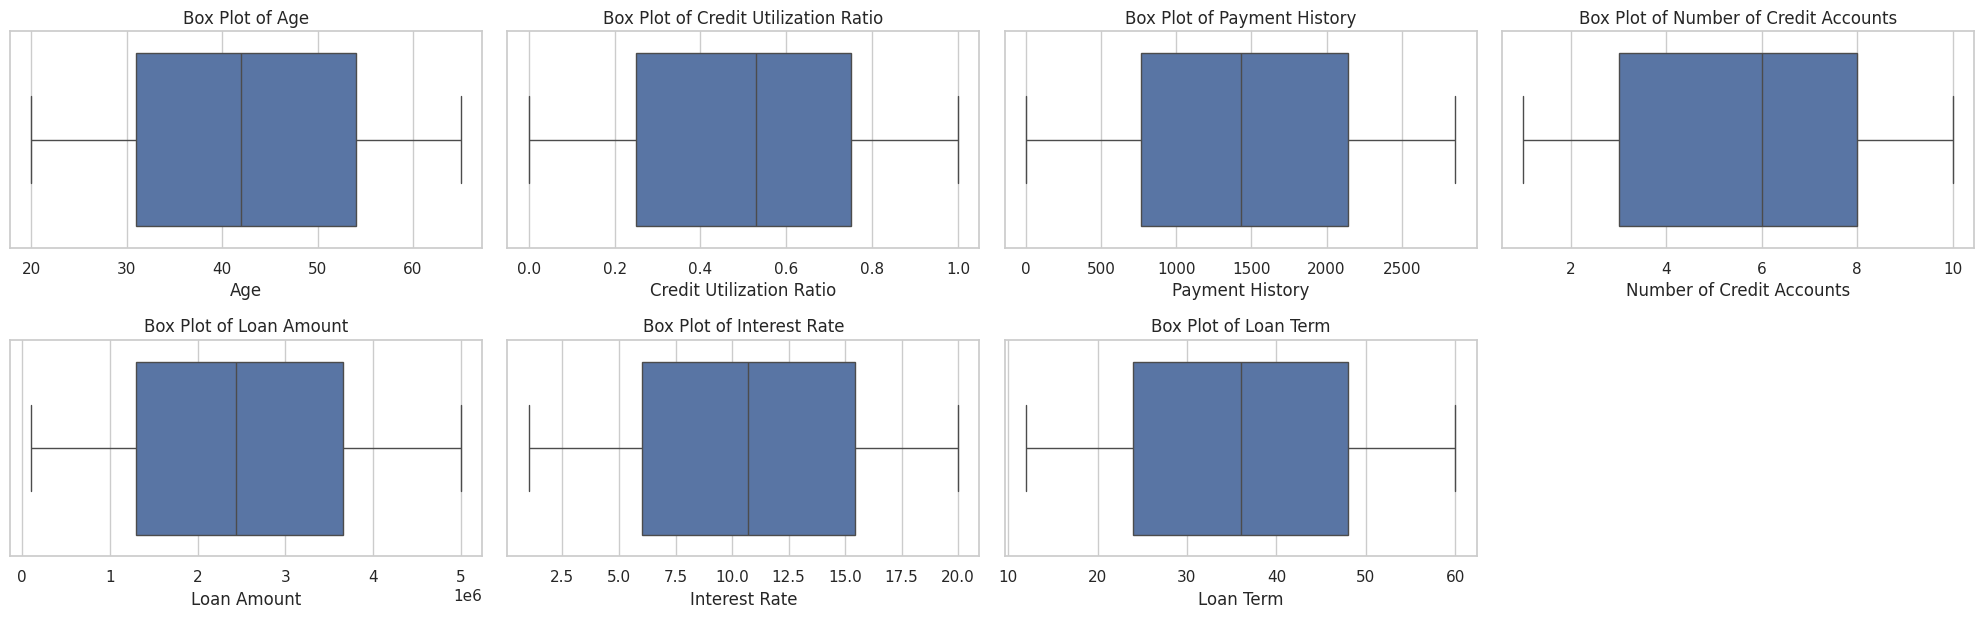

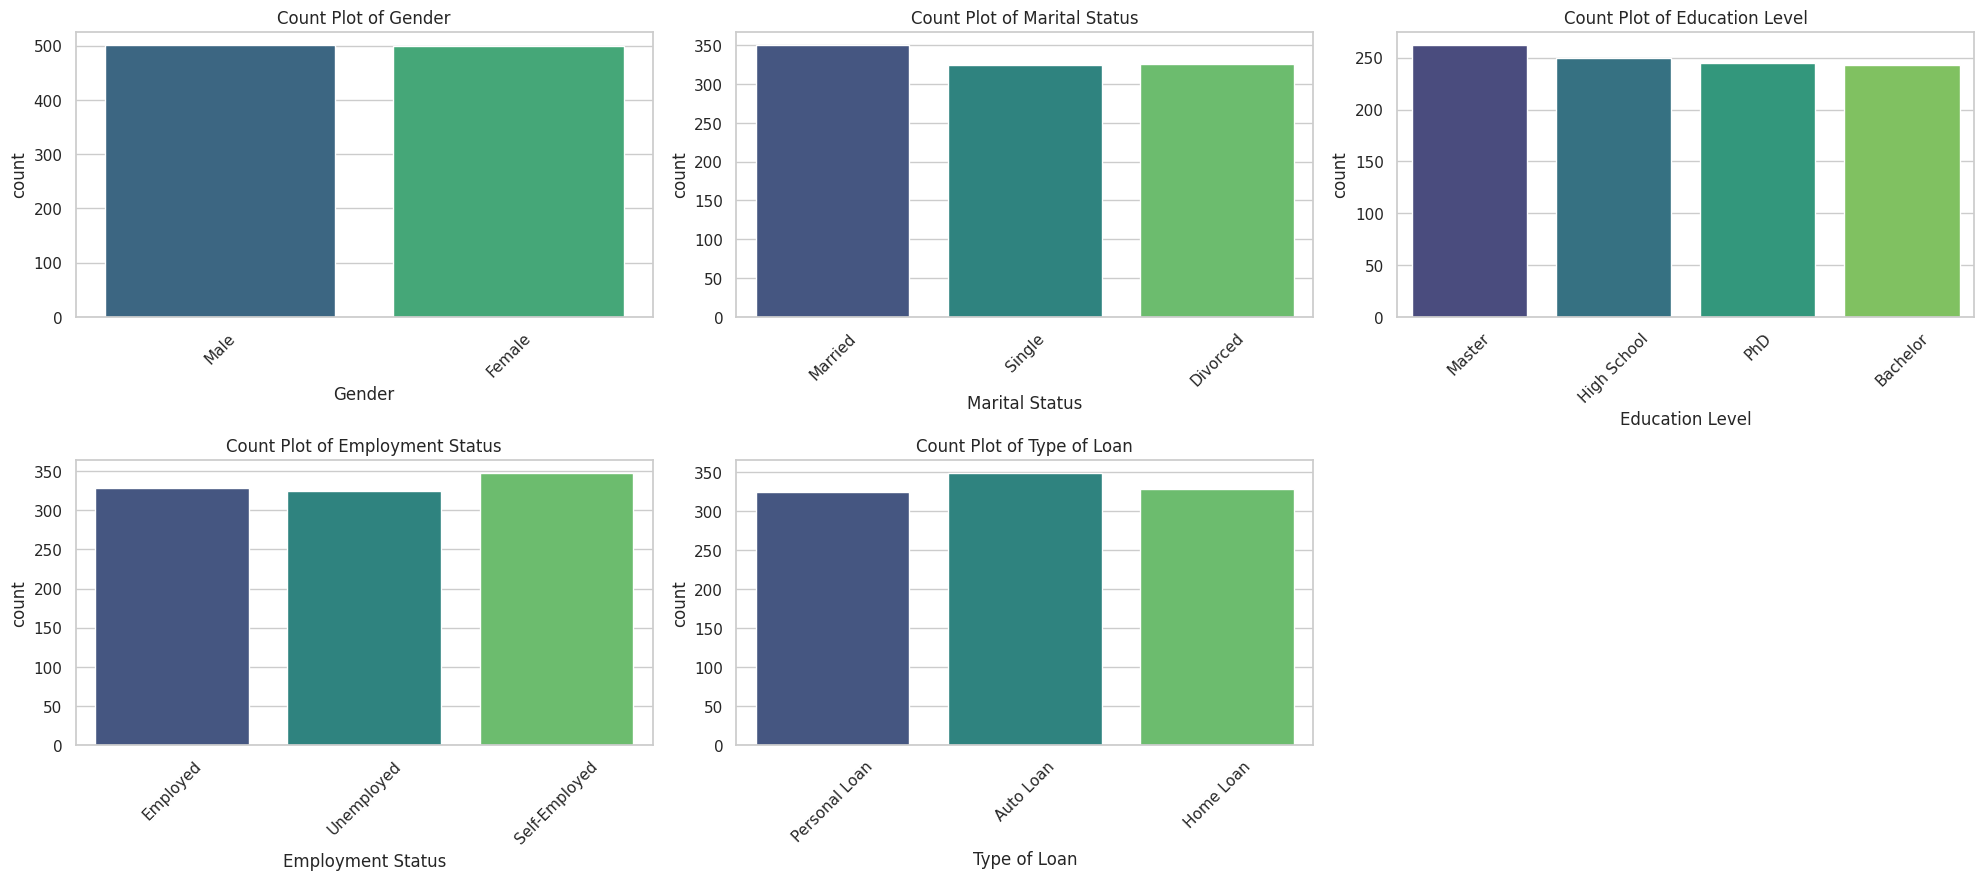

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# Plot histograms and density plots to show trends and possible skewness
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Histogram and Density Plot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Box plots for numeric variables to show data spread and potential outliers
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=data[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Categorical columns for count plots
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Employment Status', 'Type of Loan']

# Plot count plots for categorical columns
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=data[col], hue=data[col], palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Visualizing relationships

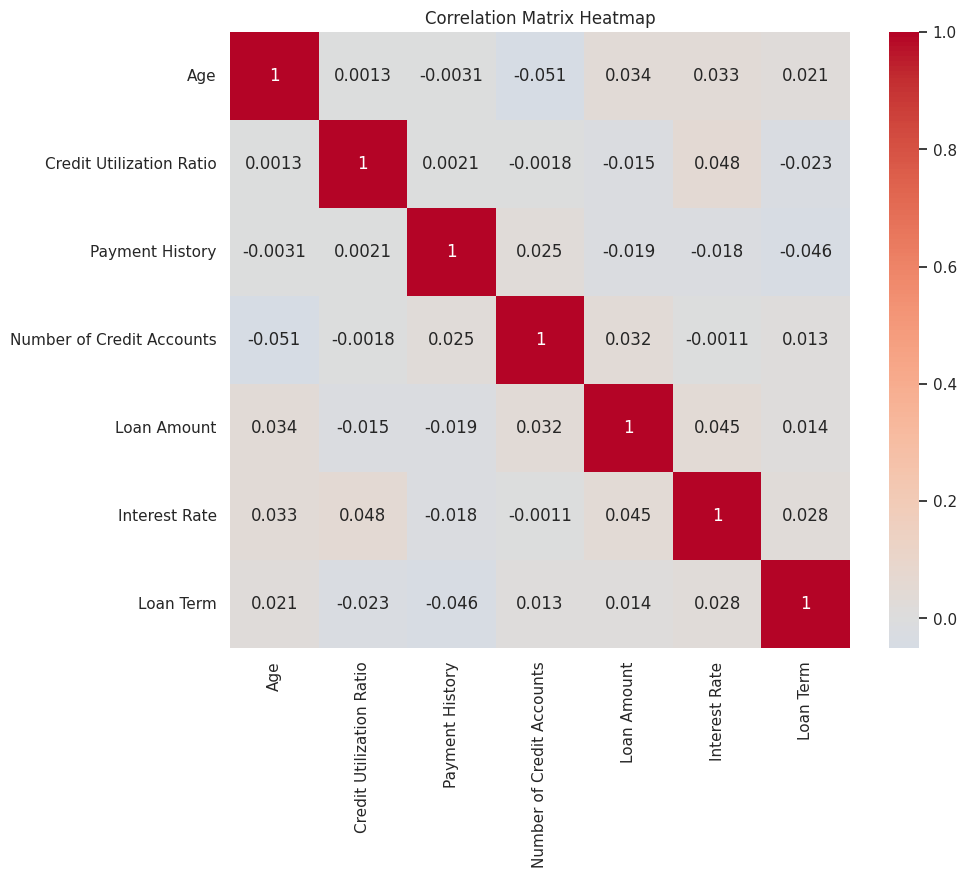

In [28]:
# Calculate the correlation matrix
numeric_df = data[numeric_cols]
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


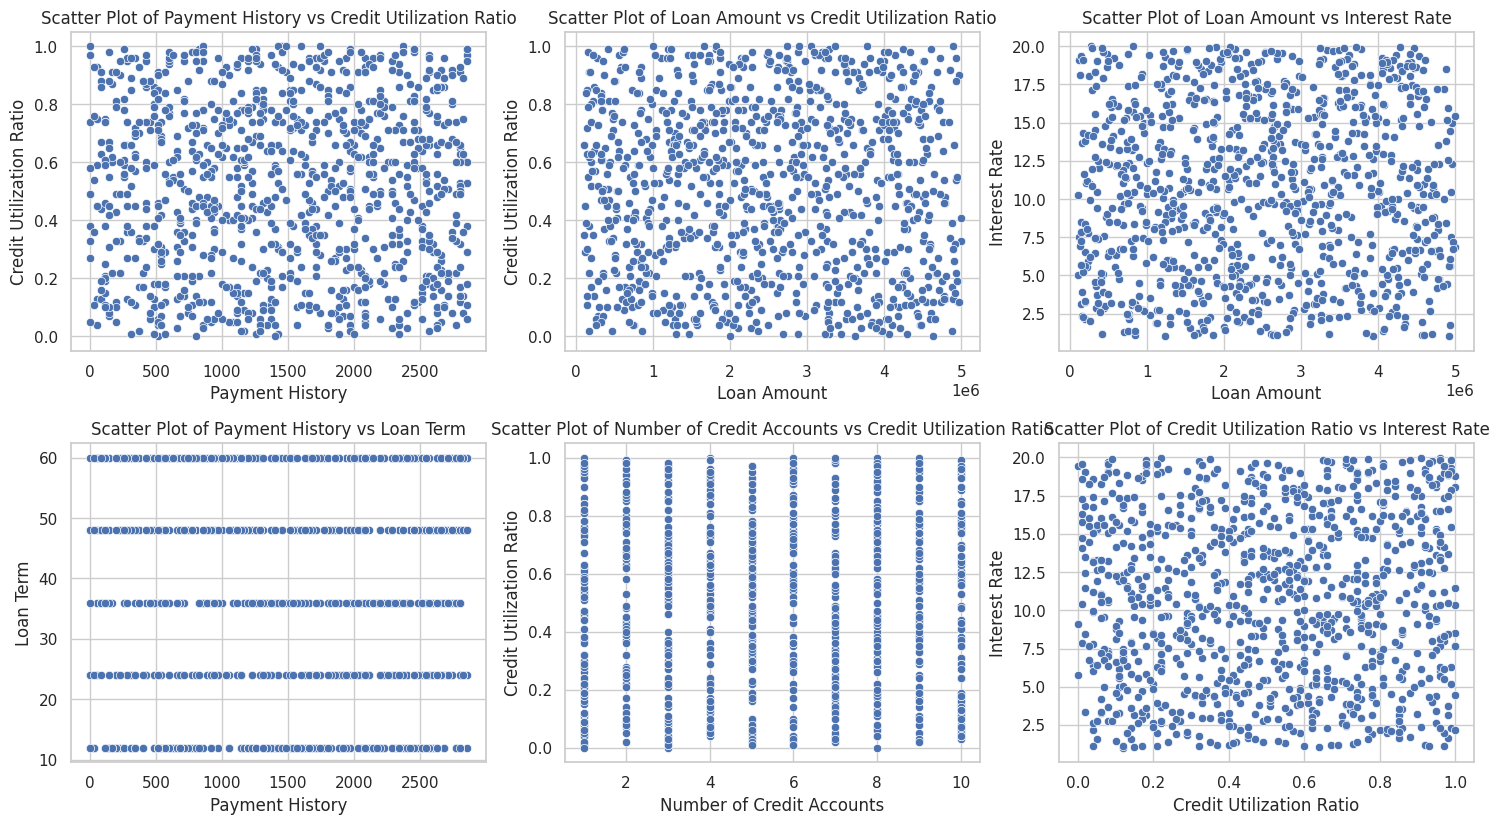

In [29]:
scatter_pairs = [('Payment History', 'Credit Utilization Ratio'), ('Loan Amount', 'Credit Utilization Ratio'), ('Loan Amount', 'Interest Rate'),
                 ('Payment History', 'Loan Term'), ('Number of Credit Accounts', 'Credit Utilization Ratio'), ('Credit Utilization Ratio', 'Interest Rate')]

plt.figure(figsize=(15, 12))
for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[x], y=data[y])
    plt.title(f"Scatter Plot of {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()


<ipython-input-30-c5186a077b65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type of Loan", y="Loan Amount", data=data, palette="Set2")


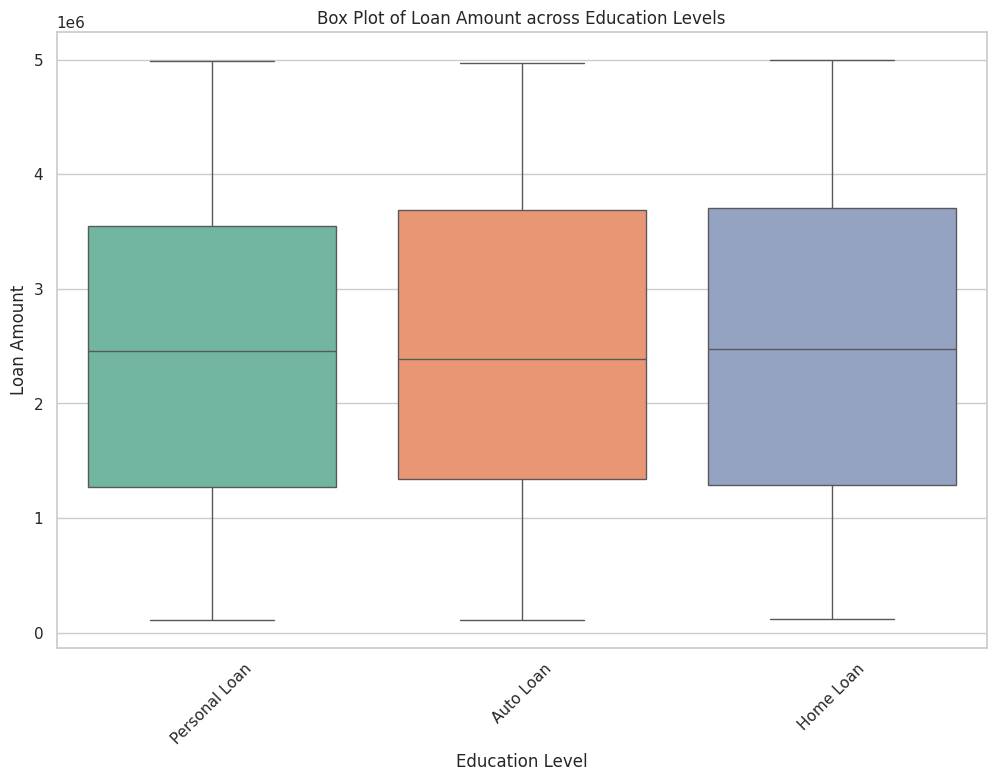

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Type of Loan", y="Loan Amount", data=data, palette="Set2")
plt.title("Box Plot of Loan Amount across Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)
plt.show()


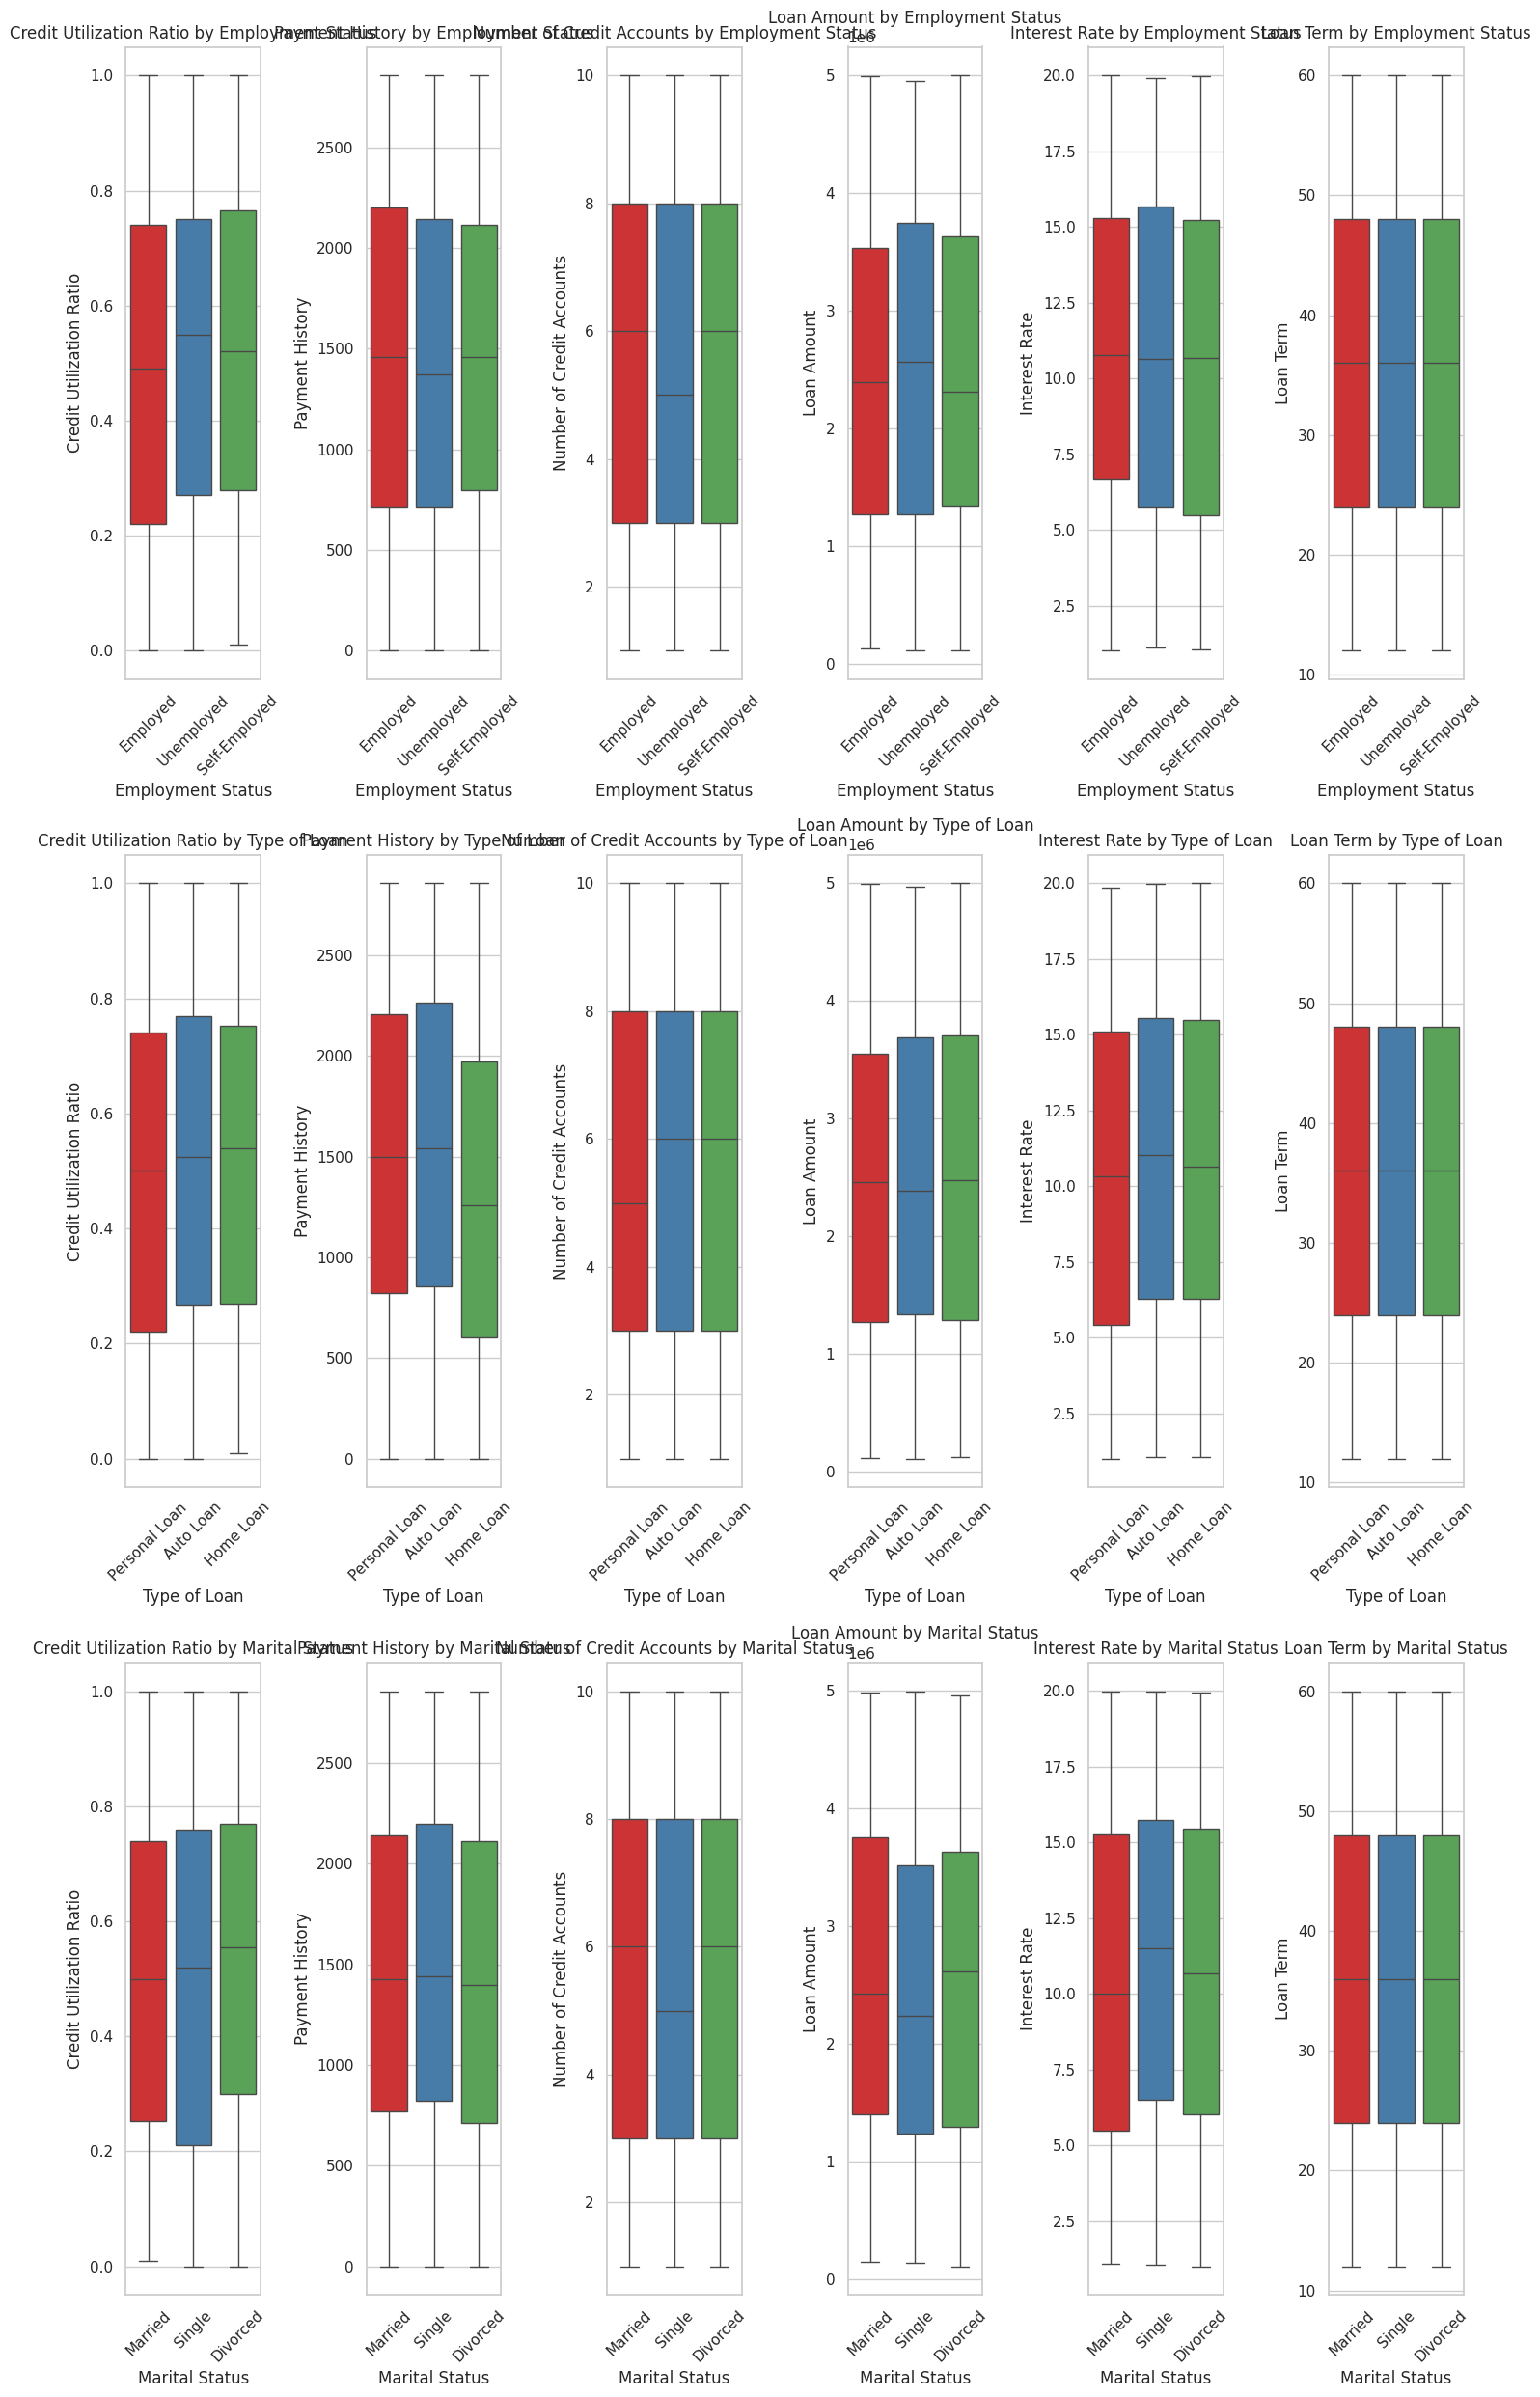

In [31]:
# Define the columns to use in the plots
categorical_columns = ['Employment Status', 'Type of Loan', 'Marital Status']
numeric_columns = ['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts', 'Loan Amount', 'Interest Rate', 'Loan Term']

# Generate box plots
plt.figure(figsize=(15, 25))
plot_num = 1
for cat_col in categorical_columns:
    for num_col in numeric_columns:
        plt.subplot(len(categorical_columns), len(numeric_columns), plot_num)
        sns.boxplot(x=cat_col, y=num_col, data=data, hue=cat_col, palette="Set1")
        plt.title(f"{num_col} by {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plot_num += 1

plt.tight_layout()
plt.show()


# Calculating Credit Score

In [32]:
# Define the factors and weights
factors = ['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts',
           'Loan Amount', 'Loan Term']
weights = {
    'Credit Utilization Ratio': 0.30,
    'Payment History': 0.35,
    'Number of Credit Accounts': 0.15,
    'Loan Amount': 0.10,
    'Loan Term': 0.10
}

# Scale the data to a 0-1 range
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[factors])
print(data_scaled)

# Calculate the weighted score
data['Credit Score'] = (
    data_scaled[:, 0] * weights['Credit Utilization Ratio'] +
    data_scaled[:, 1] * weights['Payment History'] +
    data_scaled[:, 2] * weights['Number of Credit Accounts'] +
    data_scaled[:, 3] * weights['Loan Amount'] +
    data_scaled[:, 4] * weights['Loan Term']
) * 550 + 300  # Scale to FICO range (300-850)

# Display the first few rows with the Credit Score
data[['Credit Utilization Ratio', 'Payment History', 'Number of Credit Accounts',
      'Loan Amount', 'Loan Term', 'Credit Score']].head()


[[0.22       0.93979699 0.11111111 0.93432897 0.75      ]
 [0.2        0.82989149 0.88888889 0.71828969 1.        ]
 [0.22       0.96989849 0.55555556 0.17369067 0.        ]
 ...
 [0.18       0.91984599 1.         0.47770049 0.        ]
 [0.32       0.39971999 0.22222222 0.2440671  0.25      ]
 [0.17       0.35981799 0.44444444 0.83346972 0.25      ]]


,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Loan Term,Credit Score
0,0.22,2685.0,2,4675000,48,619.015681
1,0.20,2371.0,9,3619000,60,660.593379
2,0.22,2771.0,6,957000,12,578.391781
3,0.12,1371.0,2,4731000,60,528.360618
4,0.99,828.0,2,3289000,36,591.598714


# Customer Segmentation

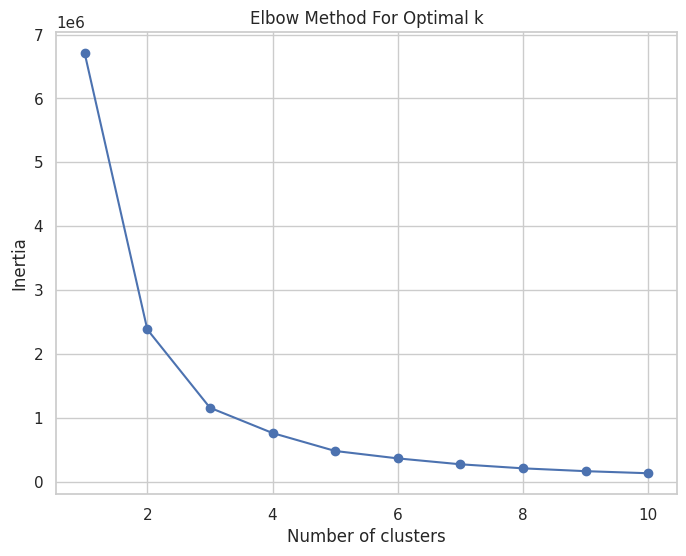

In [33]:
# Elbow method to find the optimal number of clusters
X = data[['Credit Score']]
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [34]:
# Fit the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

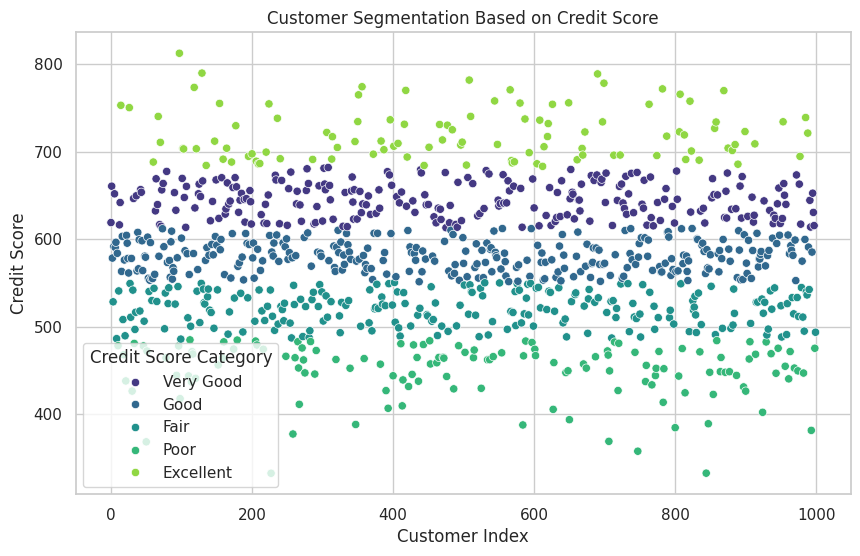

In [35]:
# Dictionary to map clusters to names
cluster_names = {
    0: 'Fair',
    1: 'Very Good',
    2: 'Good',
    3: 'Poor',
    4: 'Excellent'
}

# Map the cluster numbers to the names
data['Cluster_Name'] = data['Cluster'].map(cluster_names)

# Visualize the clusters with cluster names
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.index, y='Credit Score', hue='Cluster_Name', palette='viridis')
plt.title('Customer Segmentation Based on Credit Score')
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.legend(title='Credit Score Category')
plt.show()
